In [1]:
# importing required libraries
import pandas as pd
import numpy as np
# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# importing required libraries for normalizing data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

from keras.models import Sequential #importing Sequential layer
from keras.layers import Dense
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay # for generating a classification report,confusion matrix of model

import joblib

In [2]:
file_path = 'train_data.csv'
file_path_test = 'test_data.csv'

In [3]:
df = pd.read_csv(file_path)
test_df = pd.read_csv(file_path_test)

In [4]:
columns = ([
    'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 
    'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 
    'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 
    'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 
    'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 
    'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 
    'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 
    'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 
    'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 
    'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 
    'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 
    'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 
    'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 
    'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 
    'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 
    'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 
    'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 
    'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 
    'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 
    'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 
    'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 
    'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 
    'Label'
])

df.columns = columns
test_df.columns = columns


df.head()


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.3.130-200.175.2.130-38694-4444-6,192.168.3.130,38694,200.175.2.130,4444,6,10-01-2020 05:02,269709,4,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R
1,192.168.3.130-200.175.2.130-38694-4444-6,192.168.3.130,38694,200.175.2.130,4444,6,10-01-2020 20:57,265711,4,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R
2,192.168.3.130-200.175.2.130-48052-4444-6,192.168.3.130,48052,200.175.2.130,4444,6,10-01-2020 16:52,8734991,3,4,...,0,2816.0,0.0,2816.0,2816.0,8728974.0,0.0,8728974.0,8728974.0,U2R
3,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10-01-2020 20:36,273133,2,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R
4,192.168.3.130-200.175.2.130-38693-4444-6,192.168.3.130,38693,200.175.2.130,4444,6,10-01-2020 05:02,268599,2,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R


In [5]:
test_df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.3.130-6.234.132.122-0-0-0,6.234.132.122,0.0,192.168.3.130,0.0,0.0,10-01-2020 05:56,22.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
1,192.168.3.130-118.48.124.50-0-0-0,118.48.124.50,0.0,192.168.3.130,0.0,0.0,10-01-2020 05:57,22.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
2,192.168.3.130-96.220.28.124-0-0-0,96.220.28.124,0.0,192.168.3.130,0.0,0.0,10-01-2020 05:57,21.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
3,192.168.3.130-44.210.214.130-0-0-0,44.210.214.130,0.0,192.168.3.130,0.0,0.0,10-01-2020 05:56,157.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
4,192.168.3.130-39.243.165.16-0-0-0,39.243.165.16,0.0,192.168.3.130,0.0,0.0,10-01-2020 05:56,15.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS


In [6]:
df.shape

(275113, 84)

In [7]:
test_df.shape

(108537, 84)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275113 entries, 0 to 275112
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            275113 non-null  object 
 1   Src IP             275113 non-null  object 
 2   Src Port           275113 non-null  int64  
 3   Dst IP             275113 non-null  object 
 4   Dst Port           275113 non-null  int64  
 5   Protocol           275113 non-null  int64  
 6   Timestamp          275113 non-null  object 
 7   Flow Duration      275113 non-null  int64  
 8   Tot Fwd Pkts       275113 non-null  int64  
 9   Tot Bwd Pkts       275113 non-null  int64  
 10  TotLen Fwd Pkts    275113 non-null  float64
 11  TotLen Bwd Pkts    275113 non-null  float64
 12  Fwd Pkt Len Max    275113 non-null  int64  
 13  Fwd Pkt Len Min    275113 non-null  int64  
 14  Fwd Pkt Len Mean   275113 non-null  float64
 15  Fwd Pkt Len Std    275113 non-null  float64
 16  Bw

In [9]:
df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,275113.000000,275113.000000,275113.000000,2.751130e+05,275113.000000,275113.000000,2.751130e+05,2.751130e+05,275113.000000,275113.000000,...,275113.000000,275113.0,2.751130e+05,2.751130e+05,2.751130e+05,2.751130e+05,2.751130e+05,2.751130e+05,2.751130e+05,2.751130e+05
mean,19451.025928,6432.937066,4.430518,5.776734e+06,3.600404,6.167099,7.645829e+02,8.820328e+03,115.929066,4.423422,...,1.542653,0.0,6.458492e+04,3.157192e+04,1.098908e+05,4.220317e+04,3.732233e+06,1.443453e+05,3.867987e+06,3.605738e+06
std,23354.437178,15111.088959,5.041929,2.068971e+07,64.904794,115.428347,7.516324e+04,3.760615e+05,660.401424,30.435246,...,44.100256,0.0,7.677493e+05,5.127719e+05,1.219475e+06,6.393400e+05,1.442044e+07,1.640570e+06,1.471124e+07,1.428387e+07
min,0.000000,0.000000,0.000000,-1.540000e+02,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,1.500000e+01,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,53.000000,6.000000,2.710000e+02,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,42238.000000,443.000000,6.000000,8.797000e+03,2.000000,3.000000,3.000000e+01,3.000000e+01,30.000000,0.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65518.000000,65389.000000,17.000000,1.200000e+08,16928.000000,34094.000000,3.160000e+07,1.070000e+08,60339.000000,3900.000000,...,11180.000000,0.0,9.150000e+07,6.680000e+07,9.550000e+07,9.150000e+07,1.200000e+08,4.030000e+07,1.200000e+08,1.200000e+08


In [10]:
df.isnull().values.any()

False

In [11]:
test_df.isnull().values.any()

True

In [12]:
df['Label'].value_counts()

Label
DDoS          73529
Normal        54740
Probe         52905
DDoS          48413
DoS           43748
BFA            1405
Web-Attack      192
BOTNET          164
U2R              17
Name: count, dtype: int64

In [13]:
test_df['Label'].value_counts()

Label
Probe     49714
DoS       18378
DDoS      15448
Normal    13684
DDoS      11311
Name: count, dtype: int64

In [14]:
# Define your attack categories with new labels
dos_attacks = ['DoS', 'DDoS']  # Based on the provided data, 'DoS' and 'DDoS' are DOS attacks
probe_attacks = ['Probe']      # Based on the provided data, 'Probe' is the only Probe attack label
privilege_attacks = ['U2R']    # Based on the provided data, 'U2R' is the only Privilege attack label
access_attacks = ['BFA', 'Web-Attack', 'BOTNET']  # Based on the provided data, these are Access attacks

In [15]:
# Apply the updated mapping logic to the training dataset
df['attack_category'] = df['Label'].apply(
    lambda x: 'dos' if x in dos_attacks else (
        'probe' if x in probe_attacks else (
            'privilege' if x in privilege_attacks else (
                'access' if x in access_attacks else 'normal'
            )
        )
    )
)

# Apply the updated mapping logic to the test dataset
test_df['attack_category'] = test_df['Label'].apply(
    lambda x: 'dos' if x in dos_attacks else (
        'probe' if x in probe_attacks else (
            'privilege' if x in privilege_attacks else (
                'access' if x in access_attacks else 'normal'
            )
        )
    )
)

In [16]:
df['attack_category'].value_counts()

attack_category
dos          117277
normal       103153
probe         52905
access         1761
privilege        17
Name: count, dtype: int64

In [17]:
test_df['attack_category'].value_counts()

attack_category
probe     49714
dos       33826
normal    24997
Name: count, dtype: int64

In [18]:
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,attack_category
0,192.168.3.130-200.175.2.130-38694-4444-6,192.168.3.130,38694,200.175.2.130,4444,6,10-01-2020 05:02,269709,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R,privilege
1,192.168.3.130-200.175.2.130-38694-4444-6,192.168.3.130,38694,200.175.2.130,4444,6,10-01-2020 20:57,265711,4,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R,privilege
2,192.168.3.130-200.175.2.130-48052-4444-6,192.168.3.130,48052,200.175.2.130,4444,6,10-01-2020 16:52,8734991,3,4,...,2816.0,0.0,2816.0,2816.0,8728974.0,0.0,8728974.0,8728974.0,U2R,privilege
3,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10-01-2020 20:36,273133,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R,privilege
4,192.168.3.130-200.175.2.130-38693-4444-6,192.168.3.130,38693,200.175.2.130,4444,6,10-01-2020 05:02,268599,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R,privilege
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275108,192.168.20.134-200.175.2.130-80-53152-6,200.175.2.130,53152,192.168.20.134,80,6,27/12/2019 05:04:32 PM,276,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS,dos
275109,192.168.20.134-200.175.2.130-80-41798-6,192.168.20.134,80,200.175.2.130,41798,6,27/12/2019 05:05:31 PM,3923,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS,dos
275110,192.168.20.134-200.175.2.130-80-59756-6,200.175.2.130,59756,192.168.20.134,80,6,27/12/2019 05:04:44 PM,26206,2,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS,dos
275111,192.168.20.134-200.175.2.130-80-50226-6,192.168.20.134,80,200.175.2.130,50226,6,27/12/2019 05:04:23 PM,3302,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS,dos


In [19]:
test_df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,attack_category
0,192.168.3.130-6.234.132.122-0-0-0,6.234.132.122,0.0,192.168.3.130,0.0,0.0,10-01-2020 05:56,22.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS,dos
1,192.168.3.130-118.48.124.50-0-0-0,118.48.124.50,0.0,192.168.3.130,0.0,0.0,10-01-2020 05:57,22.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS,dos
2,192.168.3.130-96.220.28.124-0-0-0,96.220.28.124,0.0,192.168.3.130,0.0,0.0,10-01-2020 05:57,21.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS,dos
3,192.168.3.130-44.210.214.130-0-0-0,44.210.214.130,0.0,192.168.3.130,0.0,0.0,10-01-2020 05:56,157.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS,dos
4,192.168.3.130-39.243.165.16-0-0-0,39.243.165.16,0.0,192.168.3.130,0.0,0.0,10-01-2020 05:56,15.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108532,192.168.20.132-200.175.2.130-5907-56420-6,200.175.2.130,56420.0,192.168.20.132,5907.0,6.0,26/12/2019 01:27:12 PM,7694.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Probe,probe
108533,192.168.20.131-200.175.2.130-15004-63020-6,200.175.2.130,63020.0,192.168.20.131,15004.0,6.0,26/12/2019 01:27:30 PM,14973.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Probe,probe
108534,192.168.20.133-200.175.2.130-6969-62837-6,200.175.2.130,62837.0,192.168.20.133,6969.0,6.0,26/12/2019 01:56:04 PM,6642.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Probe,probe
108535,192.168.20.131-200.175.2.130-3001-48537-6,200.175.2.130,48537.0,192.168.20.131,3001.0,6.0,26/12/2019 01:55:18 PM,7961.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Probe,probe


In [20]:
df.drop(['Label'],axis=1,inplace=True)
test_df.drop(['Label'],axis=1,inplace=True)

In [21]:
df.shape

(275113, 84)

In [22]:
test_df.shape

(108537, 84)

In [23]:
lab = LabelEncoder()
df['protocol_type'] = lab.fit_transform(df['Protocol'])
df['Fwd PSH Flags'] = lab.fit_transform(df['Fwd PSH Flags'])
df['Bwd PSH Flags'] = lab.fit_transform(df['Bwd PSH Flags'])
df['Fwd URG Flags'] = lab.fit_transform(df['Fwd URG Flags'])
df['Bwd URG Flags'] = lab.fit_transform(df['Bwd URG Flags'])
df['attack_category'] = lab.fit_transform(df['attack_category'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275113 entries, 0 to 275112
Data columns (total 85 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            275113 non-null  object 
 1   Src IP             275113 non-null  object 
 2   Src Port           275113 non-null  int64  
 3   Dst IP             275113 non-null  object 
 4   Dst Port           275113 non-null  int64  
 5   Protocol           275113 non-null  int64  
 6   Timestamp          275113 non-null  object 
 7   Flow Duration      275113 non-null  int64  
 8   Tot Fwd Pkts       275113 non-null  int64  
 9   Tot Bwd Pkts       275113 non-null  int64  
 10  TotLen Fwd Pkts    275113 non-null  float64
 11  TotLen Bwd Pkts    275113 non-null  float64
 12  Fwd Pkt Len Max    275113 non-null  int64  
 13  Fwd Pkt Len Min    275113 non-null  int64  
 14  Fwd Pkt Len Mean   275113 non-null  float64
 15  Fwd Pkt Len Std    275113 non-null  float64
 16  Bw

In [24]:


lab = LabelEncoder()

# Ensure you are encoding columns that exist in test_df
test_df['protocol_type'] = lab.fit_transform(test_df['Protocol'])
test_df['Fwd PSH Flags'] = lab.fit_transform(test_df['Fwd PSH Flags'])
test_df['Bwd PSH Flags'] = lab.fit_transform(test_df['Bwd PSH Flags'])
test_df['Fwd URG Flags'] = lab.fit_transform(test_df['Fwd URG Flags'])
test_df['Bwd URG Flags'] = lab.fit_transform(test_df['Bwd URG Flags'])
test_df['attack_category'] = lab.fit_transform(test_df['attack_category'])

test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108537 entries, 0 to 108536
Data columns (total 85 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            108535 non-null  object 
 1   Src IP             108535 non-null  object 
 2   Src Port           108535 non-null  float64
 3   Dst IP             108535 non-null  object 
 4   Dst Port           108535 non-null  float64
 5   Protocol           108535 non-null  float64
 6   Timestamp          108535 non-null  object 
 7   Flow Duration      108535 non-null  float64
 8   Tot Fwd Pkts       108535 non-null  float64
 9   Tot Bwd Pkts       108535 non-null  float64
 10  TotLen Fwd Pkts    108535 non-null  float64
 11  TotLen Bwd Pkts    108535 non-null  float64
 12  Fwd Pkt Len Max    108535 non-null  float64
 13  Fwd Pkt Len Min    108535 non-null  float64
 14  Fwd Pkt Len Mean   108535 non-null  float64
 15  Fwd Pkt Len Std    108535 non-null  float64
 16  Bw

In [25]:
# Retrieve the mapping of encoded labels to original categories
mapping = {index: category for index, category in enumerate(lab.classes_)}

# Print the mapping
print(mapping)

{0: 'dos', 1: 'normal', 2: 'probe'}


In [26]:
df['attack_category'].value_counts()

attack_category
1    117277
2    103153
4     52905
0      1761
3        17
Name: count, dtype: int64

In [28]:
test_df['attack_category'].value_counts()

attack_category
2    49714
0    33826
1    24997
Name: count, dtype: int64

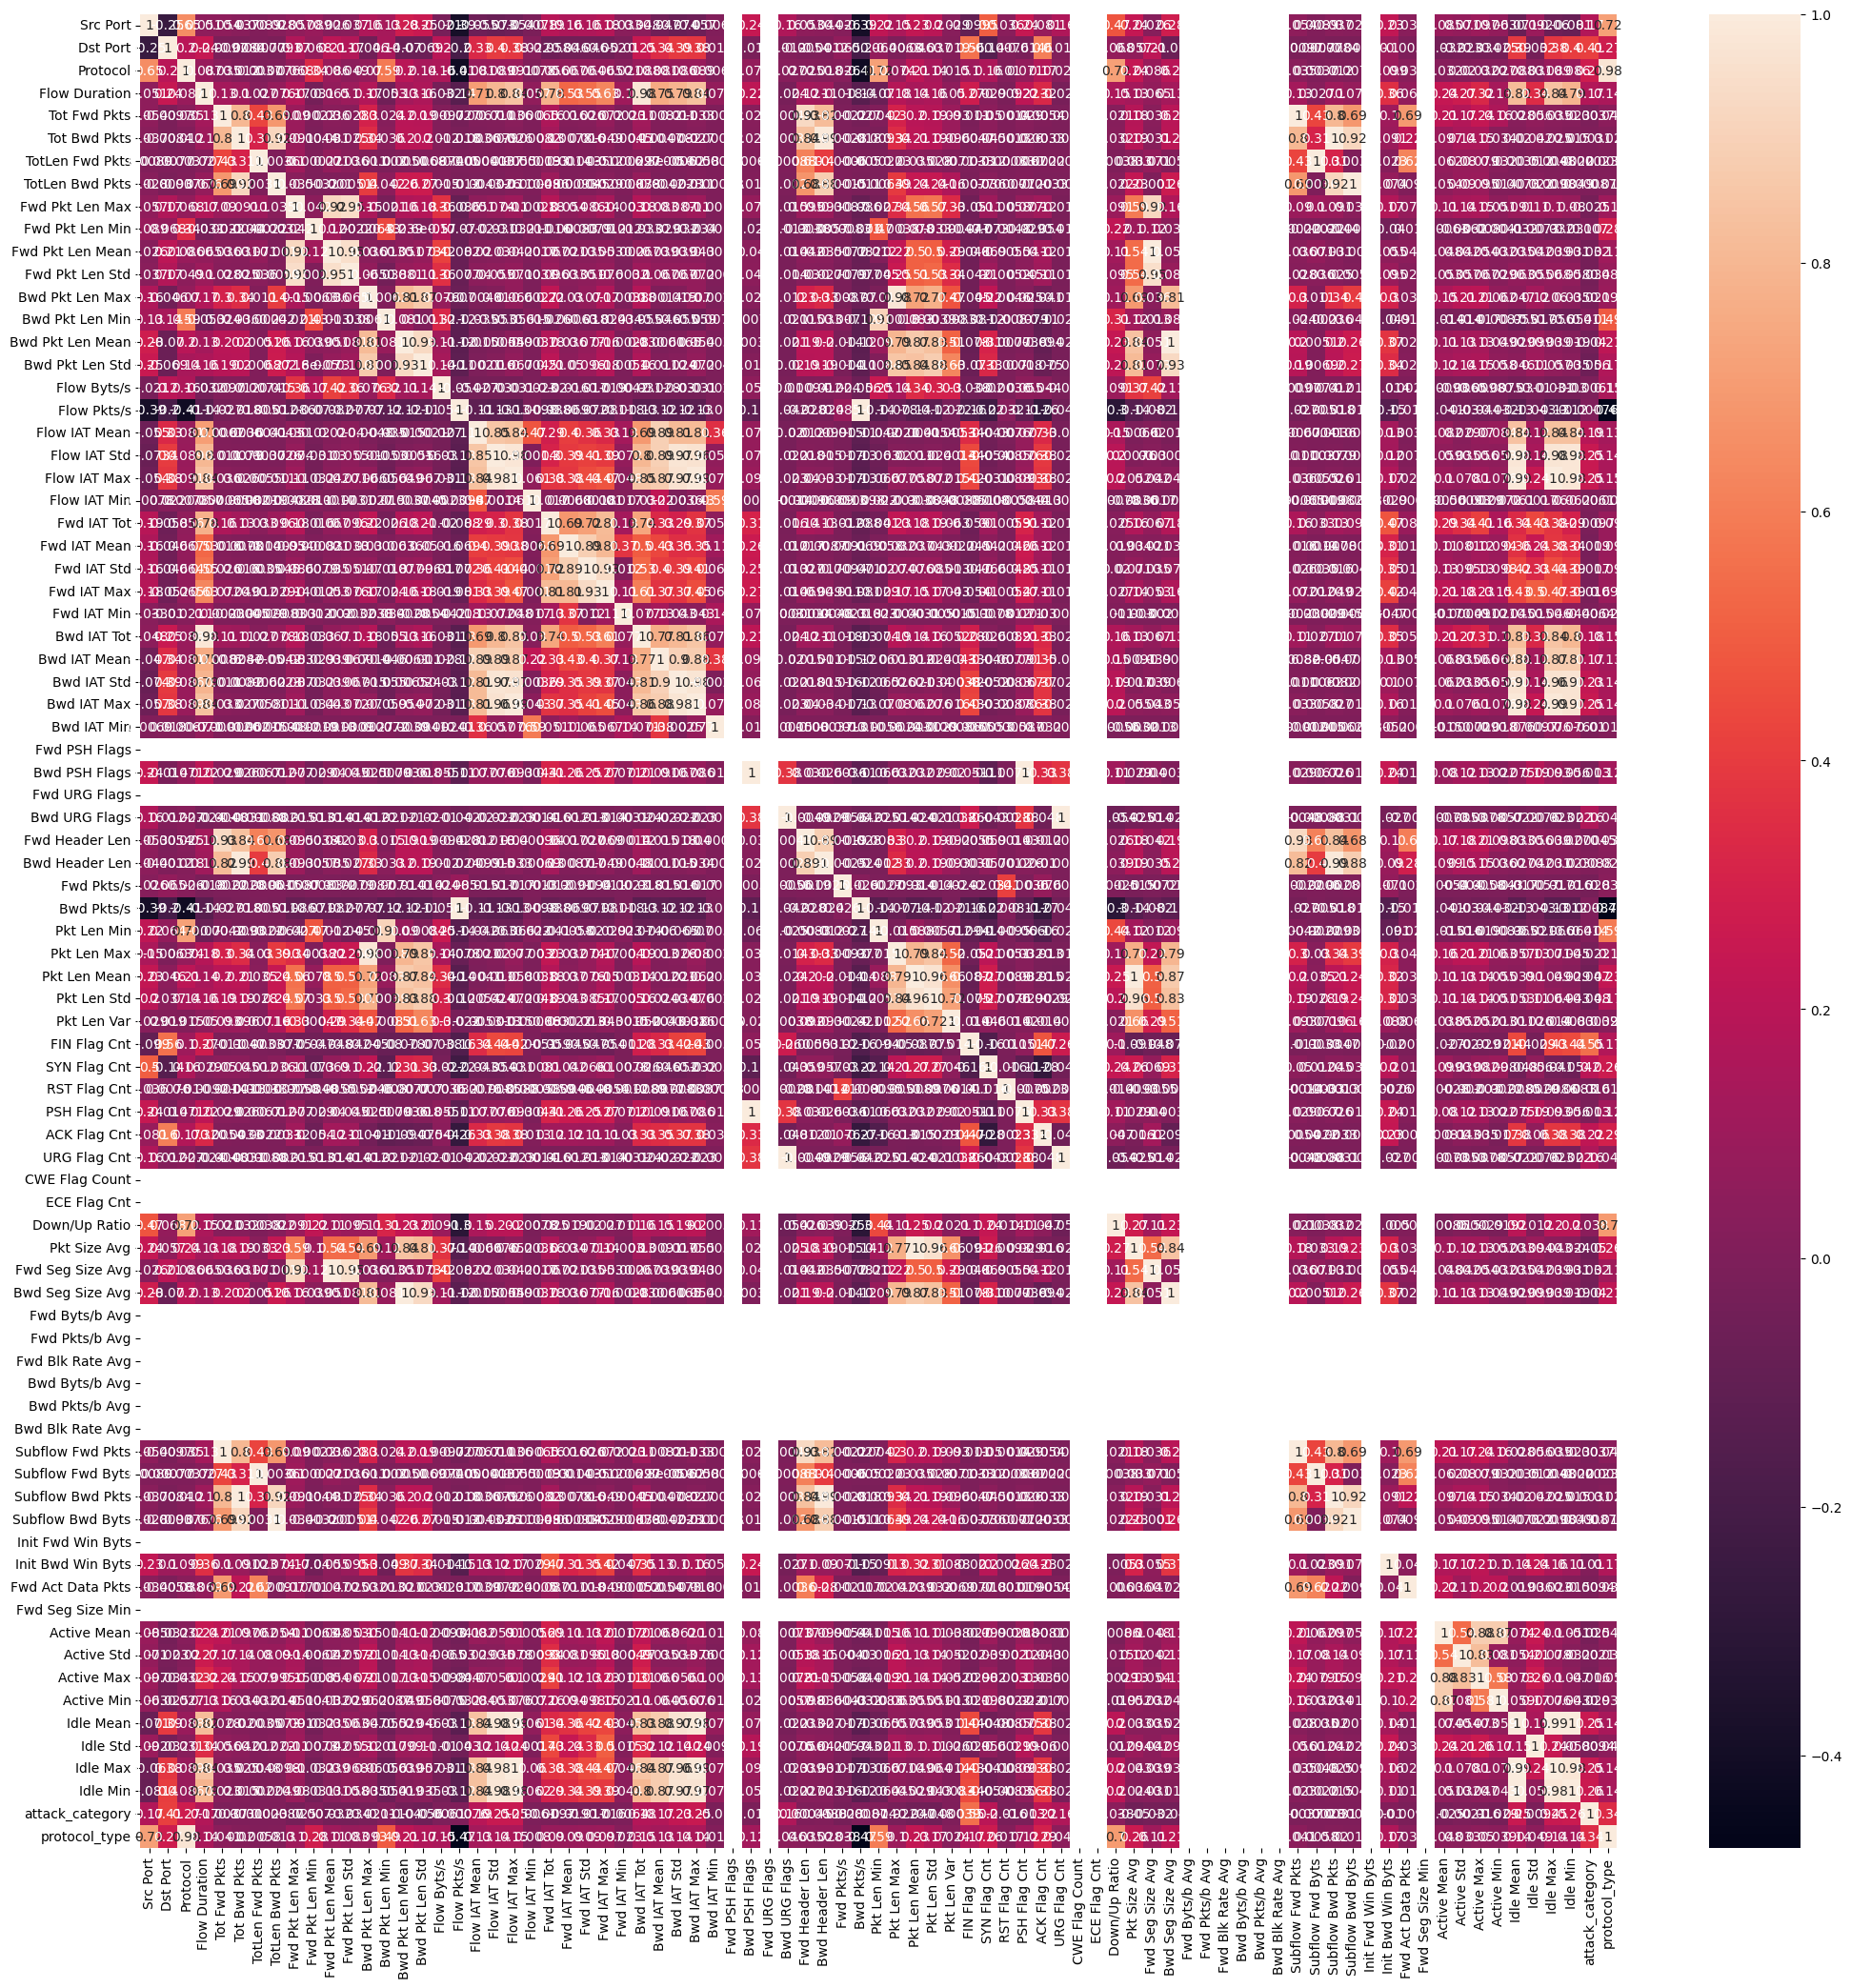

In [29]:
numeric_df = df.select_dtypes(include=['number'])

# Generate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [30]:

le = LabelEncoder()
df['attack_category'] = le.fit_transform(df['attack_category'])
df_numeric = df.select_dtypes(include=[float, int])
corr = df_numeric.corr()['attack_category']
corr = corr.drop(['attack_category'])
high_threshold = 0.5
low_threshold = 0.1

highly_correlated_features = corr[abs(corr) > high_threshold].index.tolist()
low_correlated_features = corr[abs(corr) < low_threshold].index.tolist()

print('Highly correlated features:', highly_correlated_features)
print('Low correlated features:', low_correlated_features)

Highly correlated features: ['FIN Flag Cnt']
Low correlated features: ['Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Min', 'Bwd PSH Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'RST Flag Cnt', 'PSH Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Std']


In [31]:
selected_features = highly_correlated_features + low_correlated_features

In [32]:
selected_features

['FIN Flag Cnt',
 'Tot Fwd Pkts',
 'Tot Bwd Pkts',
 'TotLen Fwd Pkts',
 'TotLen Bwd Pkts',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Flow Byts/s',
 'Flow Pkts/s',
 'Flow IAT Min',
 'Fwd IAT Tot',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Min',
 'Bwd PSH Flags',
 'Fwd Header Len',
 'Bwd Header Len',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Std',
 'Pkt Len Var',
 'RST Flag Cnt',
 'PSH Flag Cnt',
 'Down/Up Ratio',
 'Pkt Size Avg',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Subflow Fwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Bwd Byts',
 'Init Bwd Win Byts',
 'Fwd Act Data Pkts',
 'Active Mean',
 'Active Std',
 'Active Max',
 'Active Min',
 'Idle Std']

In [33]:
data = df.drop(columns=selected_features)

In [34]:
data.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Fwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'SYN Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg',
       'Init Fwd Win Byts', 'Fwd Seg Size Min', 'Idle Mean', 'Idle Max',
       'Idle Min', 'attack_category', 'protocol_type'],
      dtype='object')

In [35]:
data.shape

(275113, 36)

In [36]:
data

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Flow IAT Mean,Flow IAT Std,...,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Init Fwd Win Byts,Fwd Seg Size Min,Idle Mean,Idle Max,Idle Min,attack_category,protocol_type
0,192.168.3.130-200.175.2.130-38694-4444-6,192.168.3.130,38694,200.175.2.130,4444,6,10-01-2020 05:02,269709,3.371362e+04,9.027255e+04,...,0,0,0,-1,0,0.0,0.0,0.0,3,1
1,192.168.3.130-200.175.2.130-38694-4444-6,192.168.3.130,38694,200.175.2.130,4444,6,10-01-2020 20:57,265711,3.321388e+04,9.070782e+04,...,0,0,0,-1,0,0.0,0.0,0.0,3,1
2,192.168.3.130-200.175.2.130-48052-4444-6,192.168.3.130,48052,200.175.2.130,4444,6,10-01-2020 16:52,8734991,1.455832e+06,3.563097e+06,...,0,0,0,-1,0,8728974.0,8728974.0,8728974.0,3,1
3,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10-01-2020 20:36,273133,6.828325e+04,1.292614e+05,...,0,0,0,-1,0,0.0,0.0,0.0,3,1
4,192.168.3.130-200.175.2.130-38693-4444-6,192.168.3.130,38693,200.175.2.130,4444,6,10-01-2020 05:02,268599,6.714975e+04,1.324306e+05,...,0,0,0,-1,0,0.0,0.0,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275108,192.168.20.134-200.175.2.130-80-53152-6,200.175.2.130,53152,192.168.20.134,80,6,27/12/2019 05:04:32 PM,276,1.380000e+02,1.767767e+02,...,0,0,0,-1,0,0.0,0.0,0.0,1,1
275109,192.168.20.134-200.175.2.130-80-41798-6,192.168.20.134,80,200.175.2.130,41798,6,27/12/2019 05:05:31 PM,3923,1.961500e+03,2.713169e+03,...,0,0,0,-1,0,0.0,0.0,0.0,1,1
275110,192.168.20.134-200.175.2.130-80-59756-6,200.175.2.130,59756,192.168.20.134,80,6,27/12/2019 05:04:44 PM,26206,3.743714e+03,7.538174e+03,...,0,0,0,-1,0,0.0,0.0,0.0,1,1
275111,192.168.20.134-200.175.2.130-80-50226-6,192.168.20.134,80,200.175.2.130,50226,6,27/12/2019 05:04:23 PM,3302,1.651000e+03,6.406387e+02,...,0,0,0,-1,0,0.0,0.0,0.0,1,1


In [37]:
X = data.iloc[:,:-1]
X.shape

(275113, 35)

In [38]:
y = data.iloc[:,-1]
y.shape

(275113,)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [40]:
joblib.dump(X_train, 'X_train')
joblib.dump(X_test,'X_test')
joblib.dump(y_train,'y_train')
joblib.dump(y_test, 'y_test')

['y_test']

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(137556, 35)
(137557, 35)
(137556,)
(137557,)


In [42]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

# Example dataframes (replace with your data)
# X_train = pd.DataFrame(...)
# X_test = pd.DataFrame(...)

# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Fit and transform the training data
X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)

# Standardize the data without centering for sparse matrices
scaler = StandardScaler(with_mean=False)
X_scaled_train = scaler.fit_transform(X_train_final)
X_scaled_test = scaler.transform(X_test_final)

c:\Users\sajadh\SDN\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [43]:
svm = SVC()

In [44]:
svm.fit(X_scaled_train,y_train)

In [ ]:
y_pred_svm = svm.predict(X_scaled_test)

In [ ]:
print(classification_report(y_test,y_pred_svm))

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svm))

In [ ]:
print(confusion_matrix(y_test,y_pred_svm))

In [ ]:
from keras.utils import to_categorical
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [ ]:
num_classes = 3 

ann = Sequential()
ann.add(Dense(X_train.shape[1], activation='relu'))
ann.add(Dense(X_train.shape[1], activation='relu'))
ann.add(Dense(num_classes, activation='softmax'))

In [ ]:
ann.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
ann.fit(X_scaled_train,y_train_cat,batch_size=50,epochs=50)

In [ ]:
loss,accuracy = ann.evaluate(X_scaled_train,y_train_cat)
print('Loss',loss)
print('Accuracy',accuracy)

In [ ]:
y_pred_ann=ann.predict(X_scaled_test)
y_pred_ann

In [ ]:
y_test_cat

In [ ]:
y_train_cat

In [ ]:
print(classification_report(y_test_cat.argmax(axis=1),y_pred_ann.argmax(axis=1)))

In [ ]:
print(confusion_matrix(y_test_cat.argmax(axis=1),y_pred_ann.argmax(axis=1)))

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        y_cat = to_categorical(y)
        self.model.fit(X, y_cat, batch_size=50, epochs=50)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

# Wrap your ANN model
ann_estimator = KerasWrapper(ann)

In [ ]:
ann_estimator = KerasWrapper(ann)

In [ ]:
estimators = [('svm', svm),('ann', ann_estimator)]

In [ ]:
stacking_ensemble = StackingClassifier(estimators= estimators, final_estimator= LogisticRegression())

In [ ]:
stacking_ensemble.fit(X_scaled_train, y_train)

In [ ]:
y_pred_stack = stacking_ensemble.predict(X_scaled_test)

In [ ]:
y_pred_stack

In [ ]:
print(classification_report(y_test,y_pred_stack))